In [1]:
import numpy as np
from numba import jit
from numpy.random import default_rng as rg
rng = rg(12345)
from tqdm import tqdm
import sys
sys.path.append('../core')
%matplotlib inline

In [2]:
import torch
torch.manual_seed(0)
import torch.optim as optim

In [3]:
from FLDojo import dojo
from FL import FL
from display2 import*

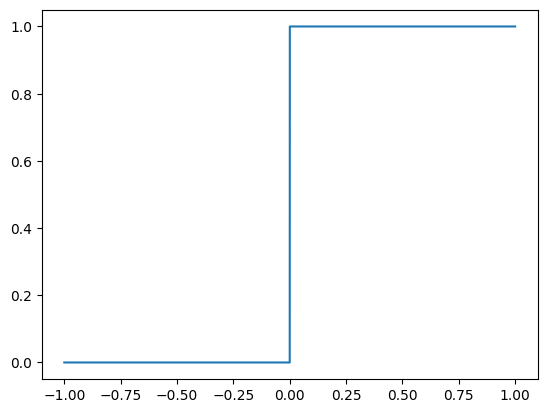

In [4]:
Xs = np.linspace(-1,1,40000)
Ys = np.concatenate([np.array([0]*20000), np.array([1]*20000)])#np.sin(Xs*2*np.pi) #+ 0.5*np.sin(Xs*9*np.pi)
from matplotlib import pyplot as plt
plt.plot(Xs,Ys)
# a three layer nn can represent any multivariate function (continuous or discontinuous) https://arxiv.org/abs/2012.03016


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]
X = torch.from_numpy(Xs).float().unsqueeze(1).to(device)
y = torch.from_numpy(Ys).float().unsqueeze(1).to(device)
split = 0.75
train_X = X[:int(split*len(X))]
train_y = y[:int(split*len(y))]
test_X = X[int(split*len(X)):]
test_y = y[int(split*len(y)):]

In [6]:
D = dojo()
D.epochs=1000
D.max_batch_size=train_X.shape[0]
opt = lambda x: optim.Adam(x, lr=0.00005)

100%|██████████| 1000/1000 [00:38<00:00, 25.93it/s]


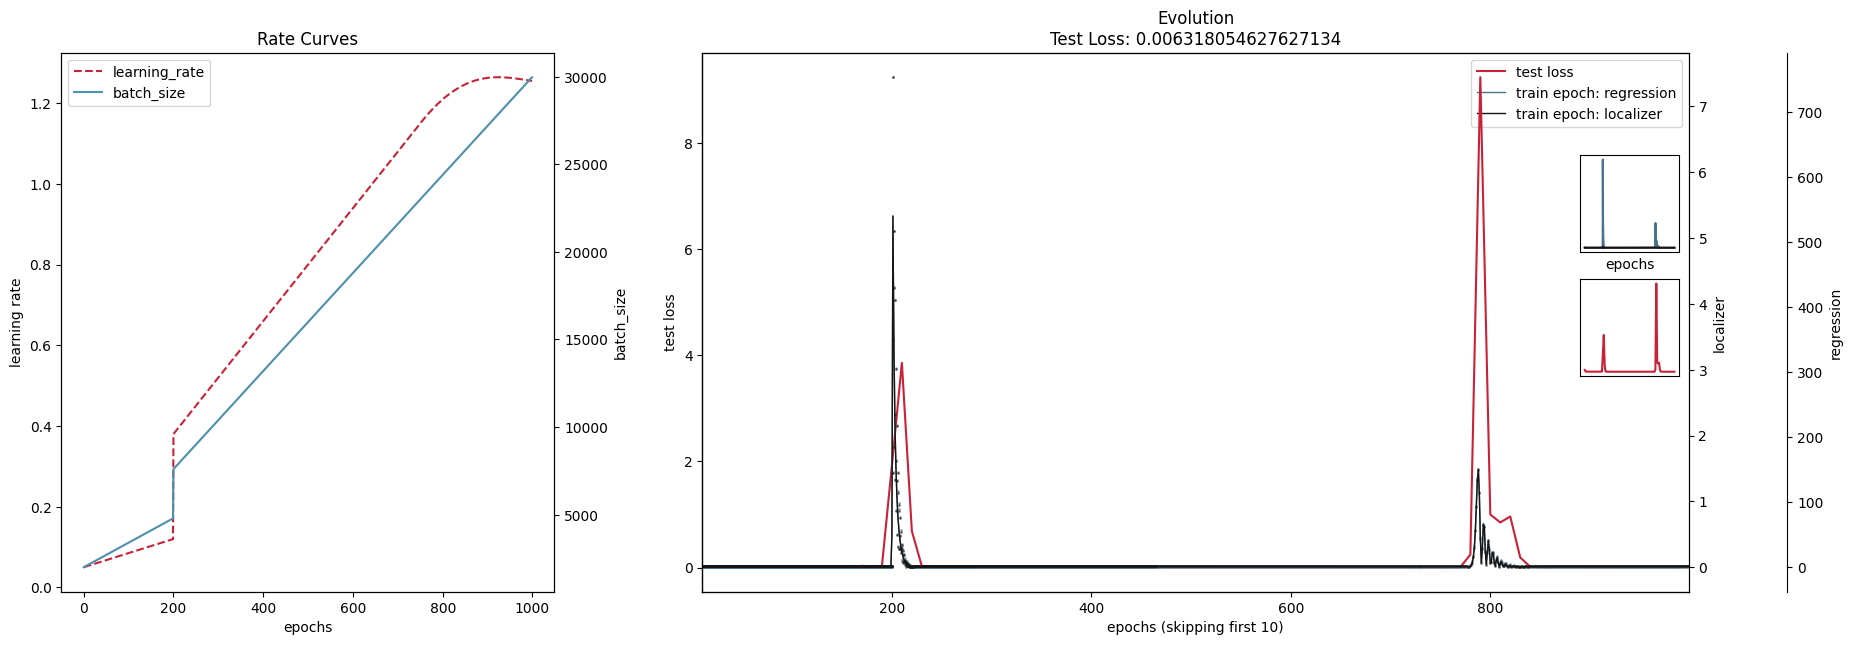

In [7]:
sizes = [1, 100, 100,] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.02
k = [0.5]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FL(device, sizes, delta, k, opttype=opt, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=2000)
ecran(net, test_X, test_y, report, classification=False)

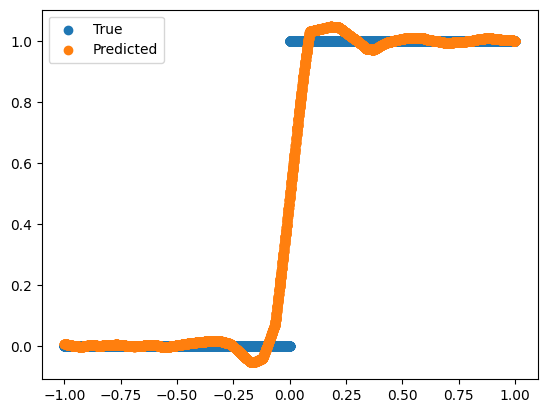

In [8]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:11<00:00, 86.91it/s]


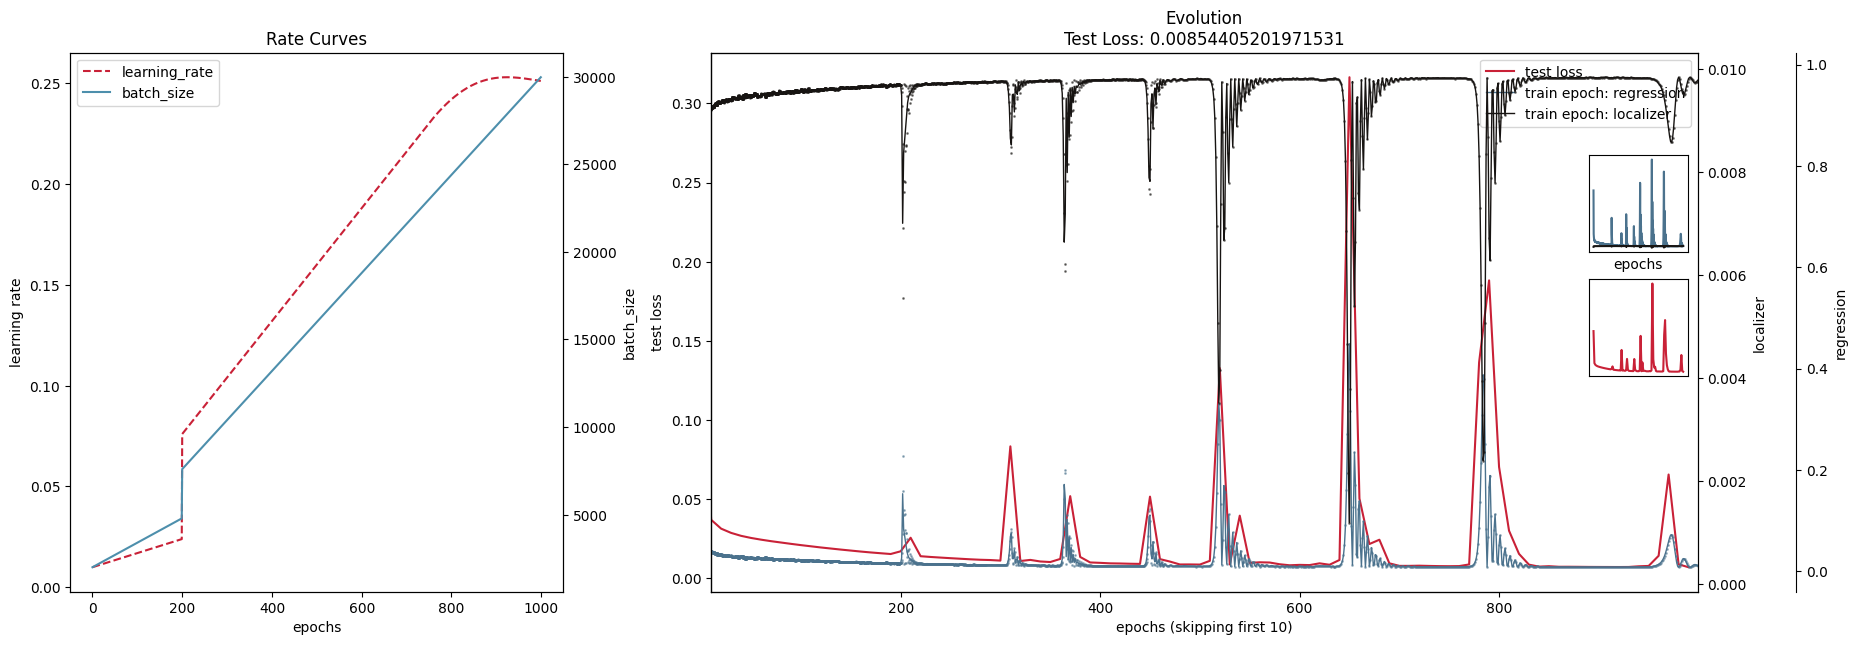

In [9]:
sizes = [1, 50] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.02
k = [0.5]*len(sizes) # smaller k seems to help slightly, but not much.
opt = lambda x: optim.Adam(x, lr=0.00001)
net = FL(device, sizes, delta, k, opttype=opt, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=2000)
ecran(net, test_X, test_y, report, classification=False)

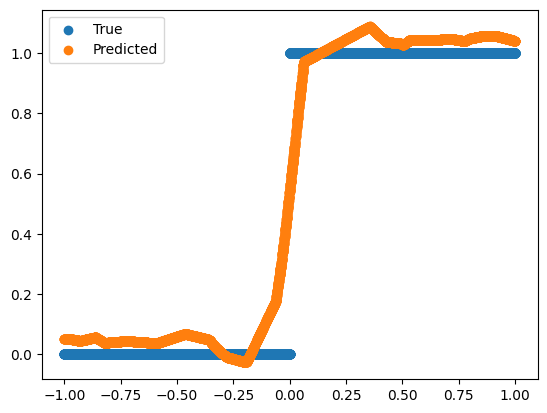

In [10]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:12<00:00, 77.42it/s]


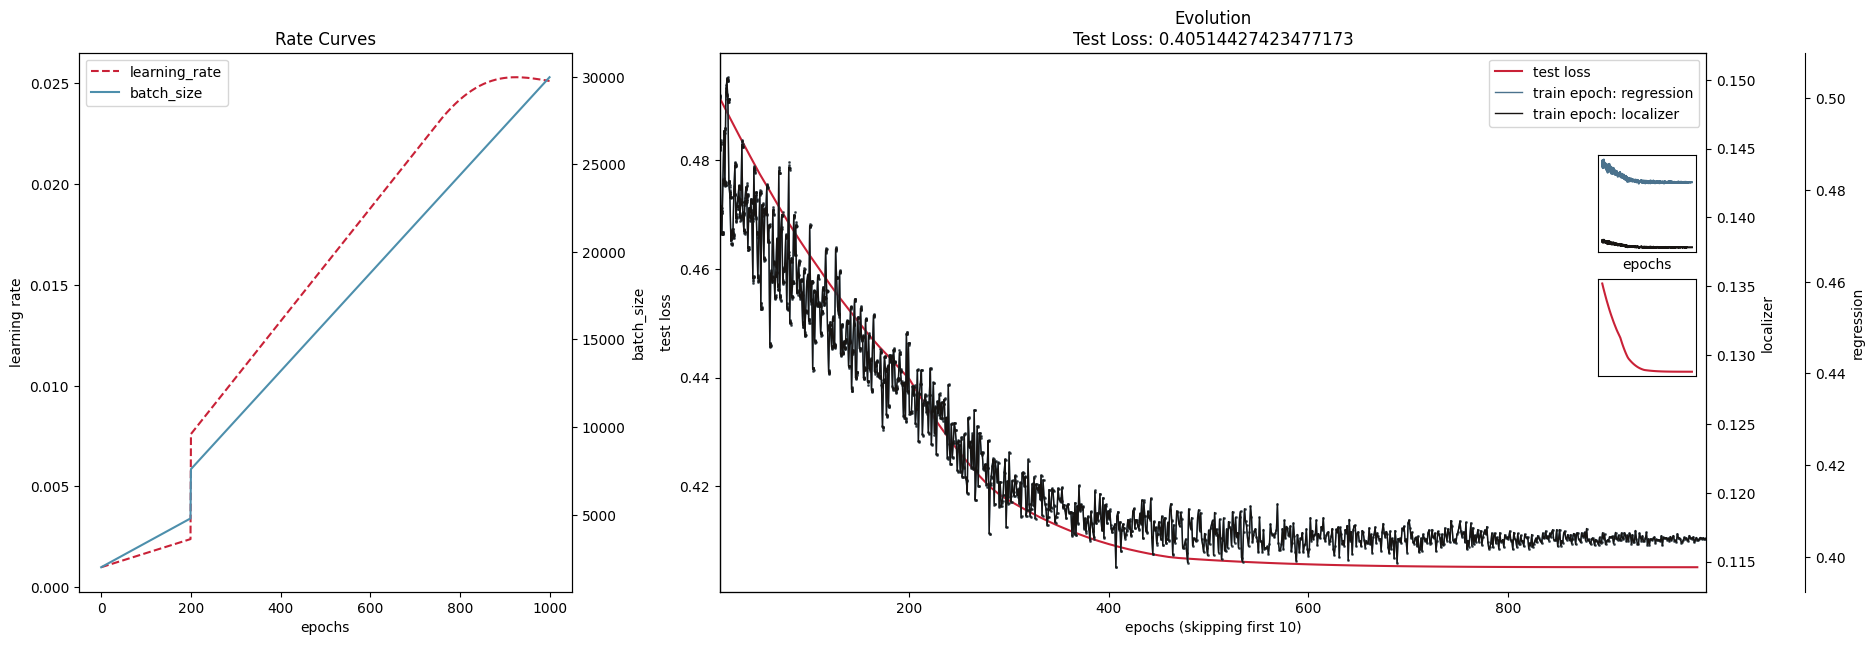

In [25]:
sizes = [1, 2] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.02
k = [0.9]*len(sizes) # smaller k seems to help slightly, but not much.
opt = lambda x: optim.Adam(x, lr=0.000001)
net = FL(device, sizes, delta, k, opttype=opt, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=2000)
ecran(net, test_X, test_y, report, classification=False)

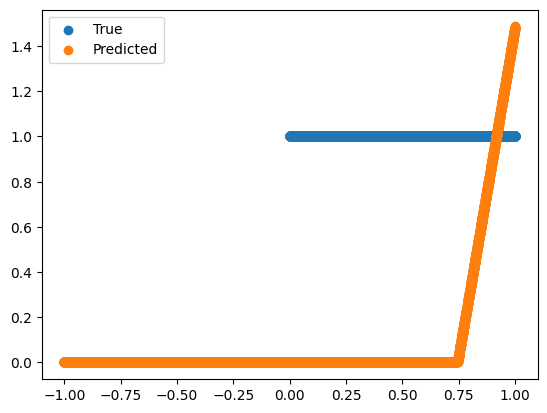

In [26]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()